<a href="https://colab.research.google.com/github/aitesam961/fuzzy-fishtick/blob/main/MADALINE_Rule_I_v1p1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MADALINE: Multiple ADAptive LINear Elements**

## Key Features;

1- Uses non-linear activation functions   
2- Like ADALINE, eliminates the MSE    
3- Unlike ADALINE, suitable for multi-layer networks  

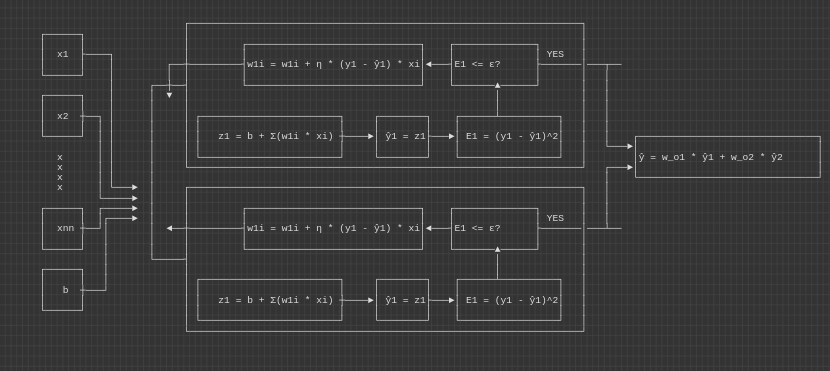


Epoch: 0 w1: 0.51072775 E1: 0.25850000000000006 w2: 0.7072832499999999 E2: 0.17550000000000004
Epoch: 1 w1: 0.5211634638256251 E1: 0.25146298375000004 w2: 0.7143682317268749 E2: 0.17072245125000007
Epoch: 2 w1: 0.531315091431632 E1: 0.24461753267486563 w2: 0.7212603425386901 E2: 0.16607495932084693
Epoch: 3 w1: 0.5411903663551344 E1: 0.2379584318916241 w2: 0.7279648328639305 E2: 0.16155398374073515
Epoch: 4 w1: 0.5507968116070318 E1: 0.2314806084794544 w2: 0.7344868102012923 E2: 0.15715608041835305
Epoch: 5 w1: 0.5601417454030594 E1: 0.2251791276151224 w2: 0.7408312430105876 E2: 0.15287789901916438
Epoch: 6 w1: 0.5692322867388246 E1: 0.21904918881361968 w2: 0.7470029644977318 E2: 0.14871618041311516
Epoch: 7 w1: 0.578075360813077 E1: 0.21308612227114093 w2: 0.7530066762966924 E2: 0.14466775419181915
Epoch: 8 w1: 0.586677704303343 E1: 0.20728538530761484 w2: 0.7588469520512057 E2: 0.1407295362533323
Epoch: 9 w1: 0.5950458704979452 E1: 0.2016425589060783 w2: 0.7645282408989917 E2: 0.1368

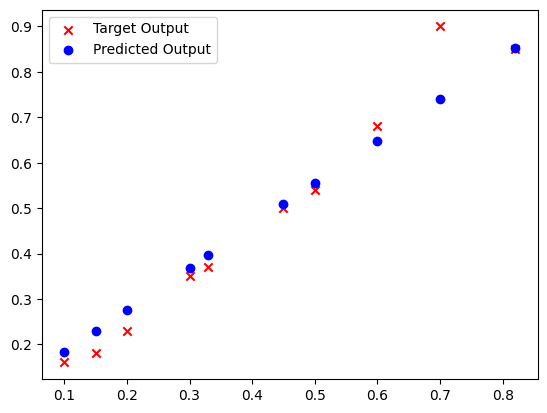

In [2]:
# input observations

x = [0.10, 0.30, 0.60, 0.70, 0.20, 0.45, 0.50, 0.82, 0.15, 0.33]
N = len(x)

# bias

b1 = 0.01
b2 = 0.01


# weights
w1 = 0.5
w2 = 0.7

# weights for pred. output
wo1 = 0.5
wo2 = 0.5

# learning rate
eta = 0.01

# targeted output
y = [0.16, 0.35, 0.68, 0.90, 0.23, 0.50, 0.54, 0.85, 0.18, 0.37]

max_epochs = 10000
threshold  = 0.0000000001

# runtime variables
E1 = 0
E2 = 0

dw1 = 0
dw2 = 0

dy1 = [0.0]*N
dy2 = [0.0]*N

error1 = [0.0]*N
error2 = [0.0]*N

dy  = [0.0]*N

# execution body
for epochs in range(max_epochs):

  # ADALINE-1
  for index in range(N):
    dy1[index] = w1 * x[index] + b1         #  dy = w * x + b
  E1 = (1/N)* sum([y[i] - dy1[i] for i in range(N)])    # error = 1/N ∑(y - dy) // not squared..
  # this aproach calculates and updates the collective
  # error of all observations in each iteration.

  b1 += eta * E1    # update bias

  # calculate and update weight
  w_sum = 0
  for i in range(N):
    w_sum +=  x[i]
  dw1 = eta * E1 * w_sum
  w1 = w1 + dw1

  # ADALINE-2
  for index in range(N):
    dy2[index] = w2 * x[index] + b2
  E2 = (1/N)* sum([y[i] - dy2[i] for i in range(N)])
  b2 += eta * E2

  w_sum = 0
  for i in range(N):
    w_sum += x[i]
  dw2 = eta* E2 * w_sum
  w2 = w2 + dw2

  print("Epoch:", epochs, "w1:",w1, "E1:",E1, "w2:",w2, "E2:",E2)

  # check for convergence
  if((E1)**2 < threshold and (E2)**2 < threshold):
    print("CONVERGED.....")
    break

# calculate dy
for index in range(N):
  dy[index] = wo1 * dy1[index] + wo2 * dy2[index]

print("===========================================================================================================")
print("dy:",dy )
print("===========================================================================================================")


if((E1)**2 > threshold and (E2)**2 > threshold):
  print("FAILED to Converge")
  print("dy:",dy )

import matplotlib.pyplot as plt

plt.scatter(x, y, marker='x', color='red', label='Target Output')
plt.scatter(x, dy, marker='o', color='blue', label='Predicted Output')
plt.legend()

plt.show()

